#### Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset. Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features. Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.
4: Random Forest Model Implementation

Divide the data into train and test split.
Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.
5: Bagging and Boosting Methods Apply the Bagging and Boosting methods and compare the results.

Additional Notes:

Explain Bagging and Boosting methods. How is it different from each other.
Explain how to handle imbalance in the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df=pd.read_excel("glass.xlsx",sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### EDA Process

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
df1=df.drop_duplicates(ignore_index=True)
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Visualizations

C:\Users\pavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


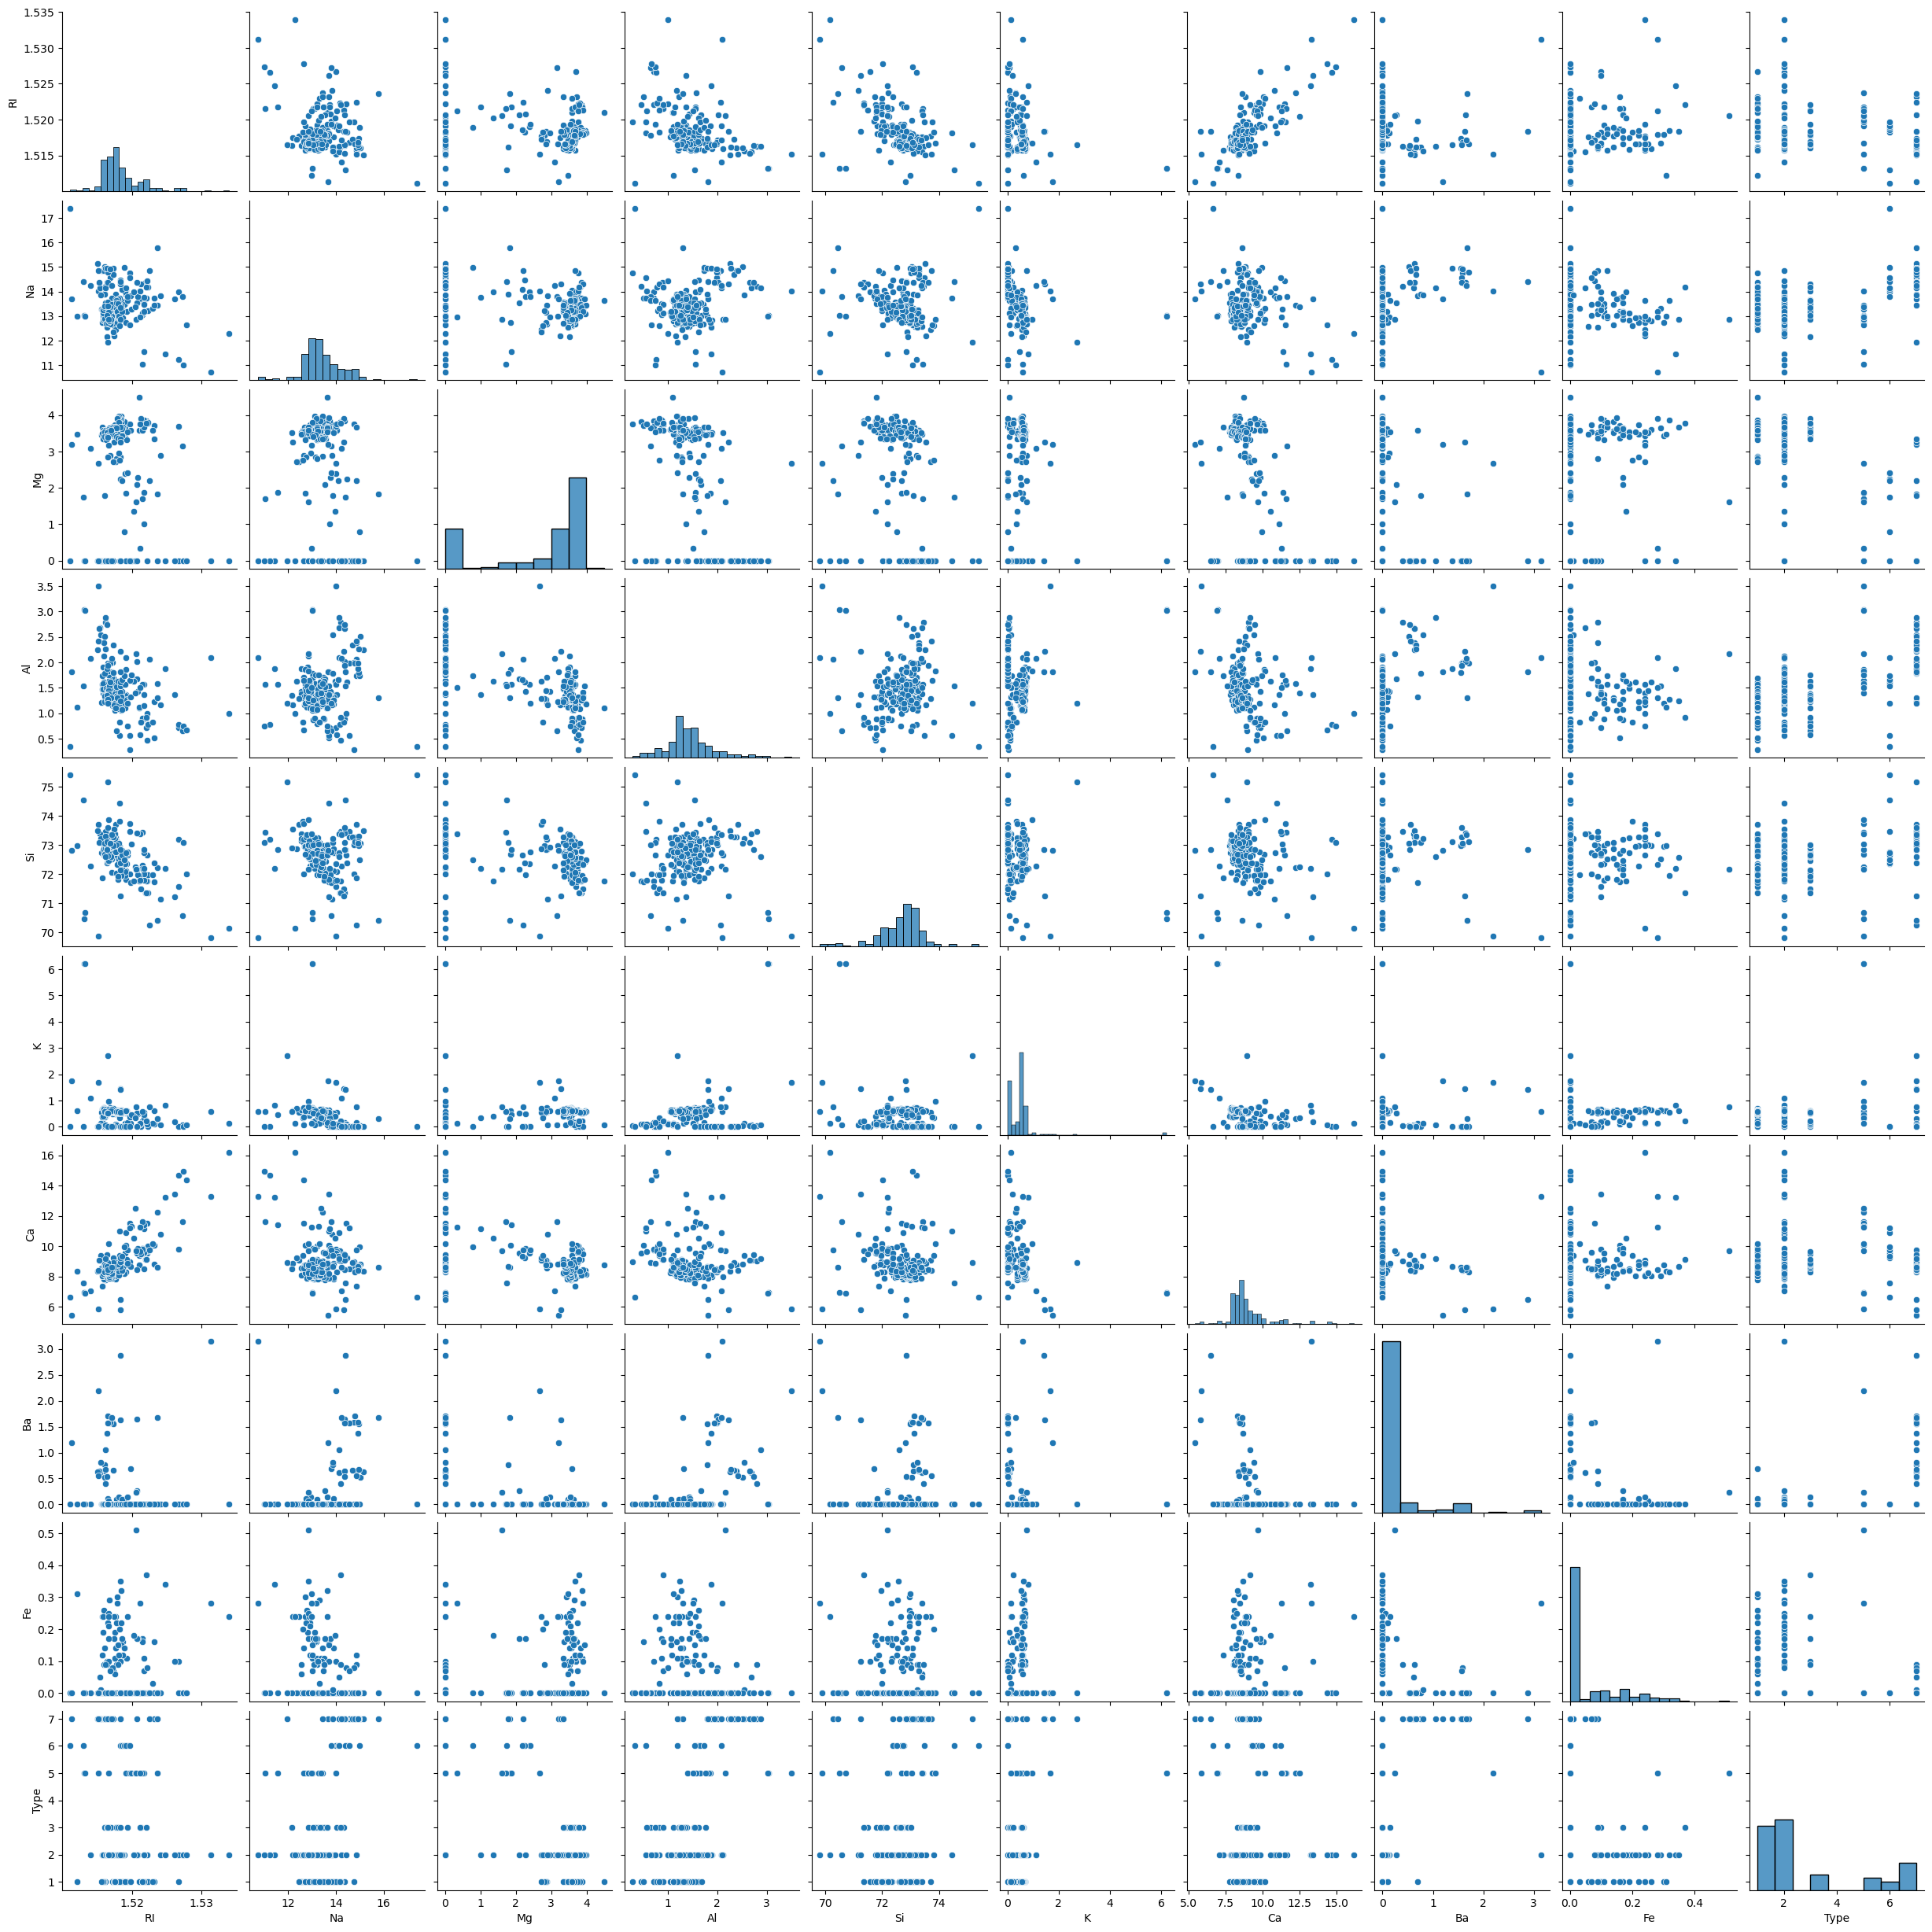

In [9]:
#pairplot
sns.pairplot(df1)

<Axes: >

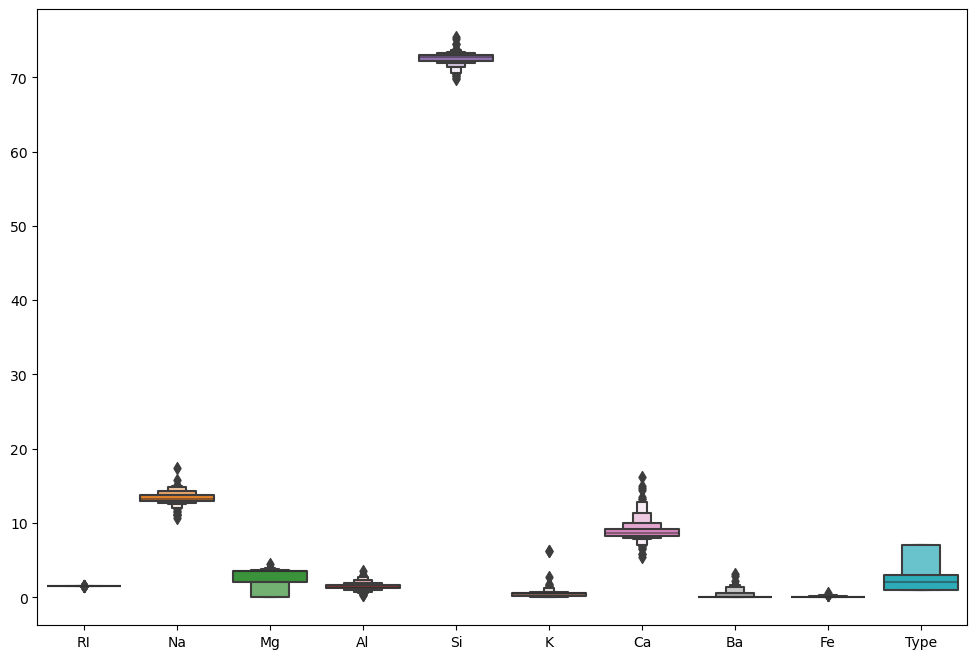

In [10]:
#boxplot for detecting outliers in the data
plt.figure(figsize=(12,8))
sns.boxenplot(df1)

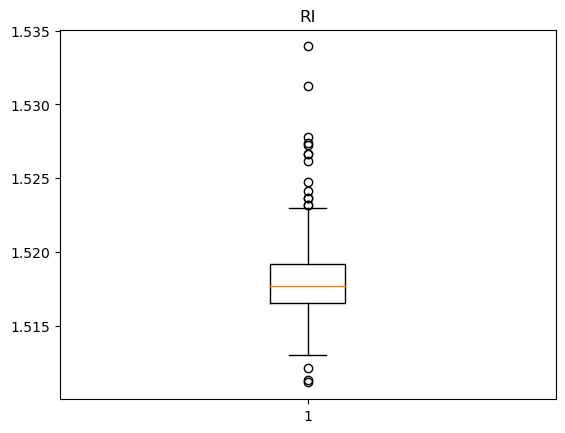

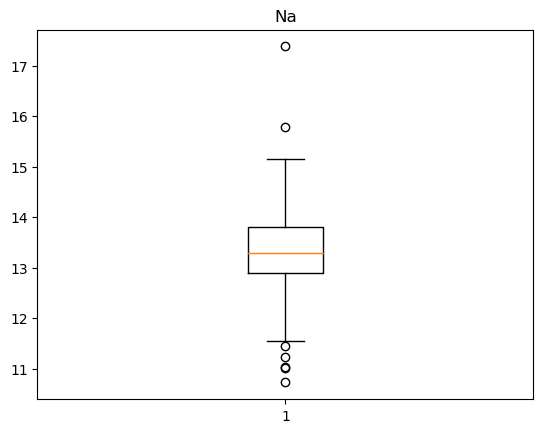

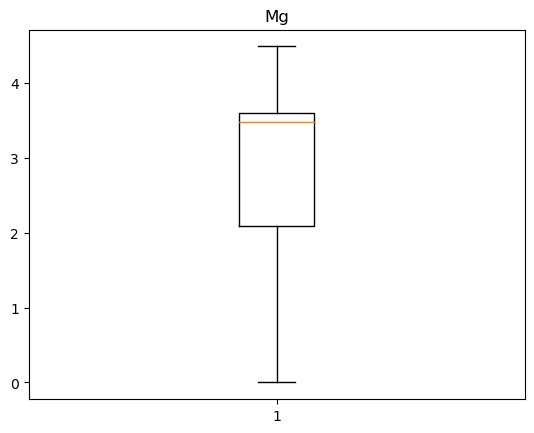

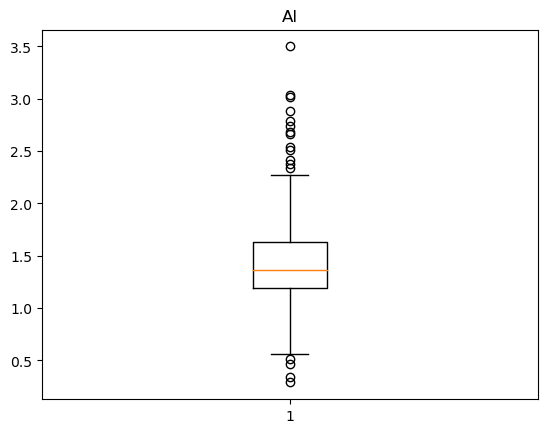

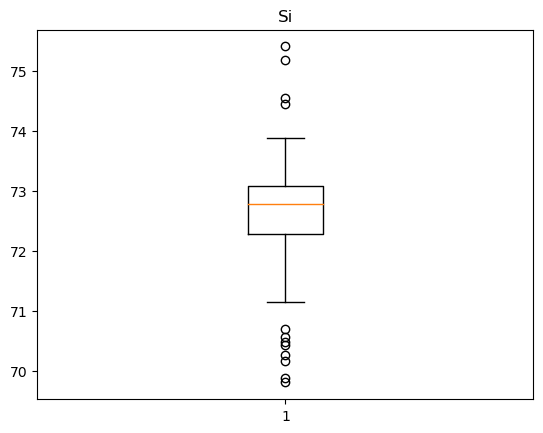

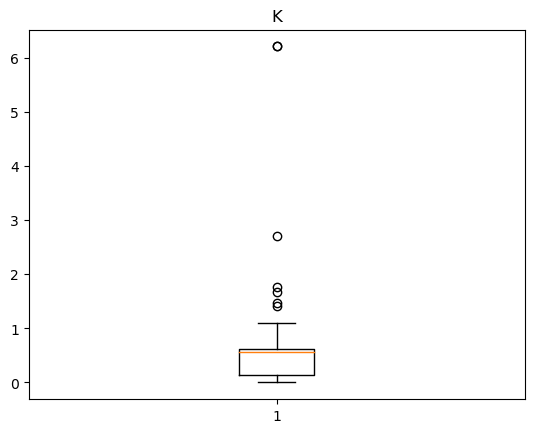

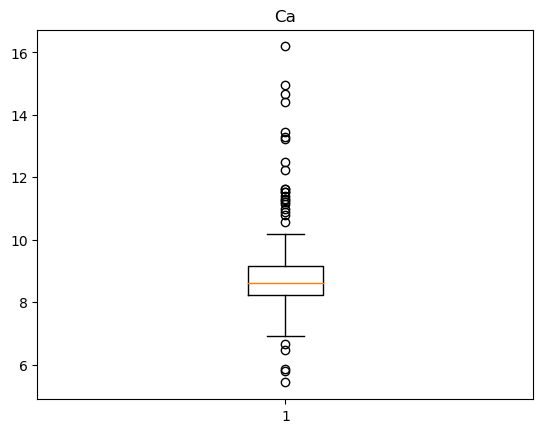

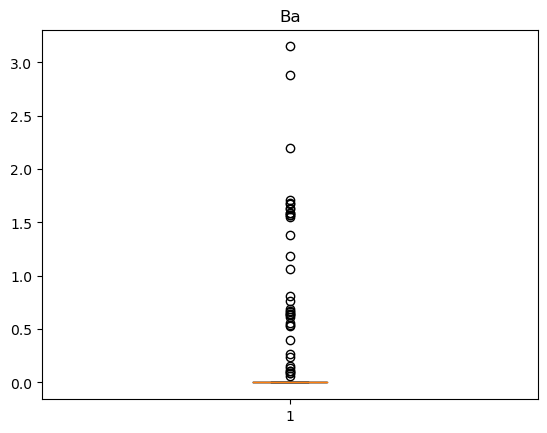

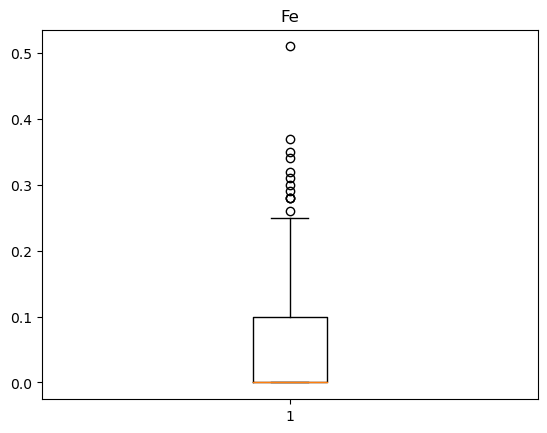

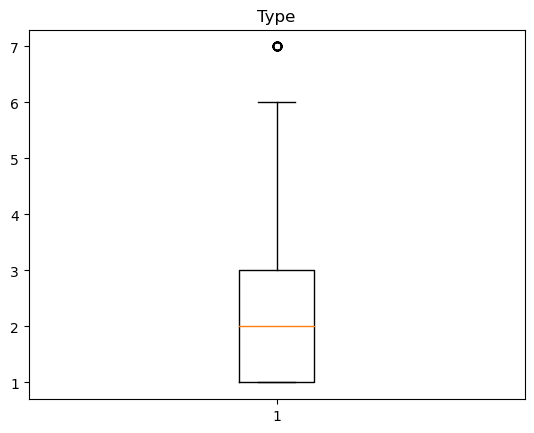

In [11]:
# Boxplot
for i in df1:
    plt.boxplot(df1[i])
    plt.title(i)
    plt.show()

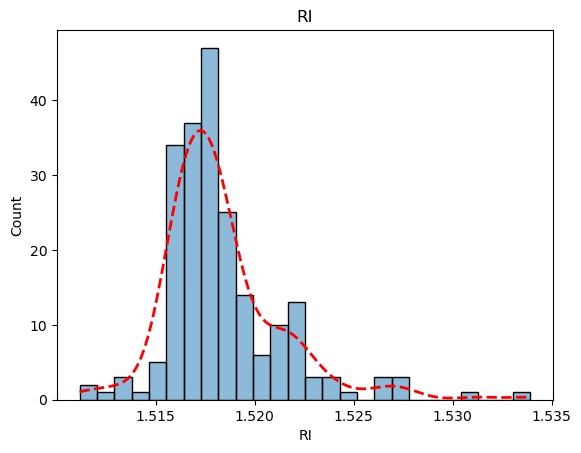

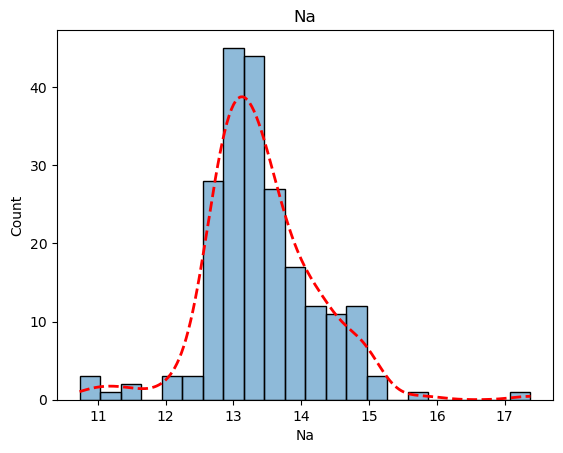

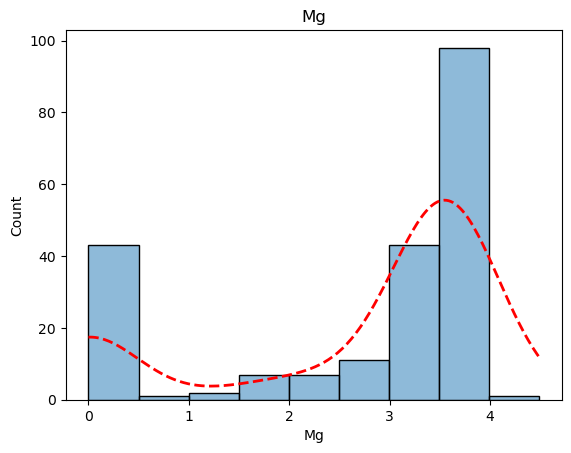

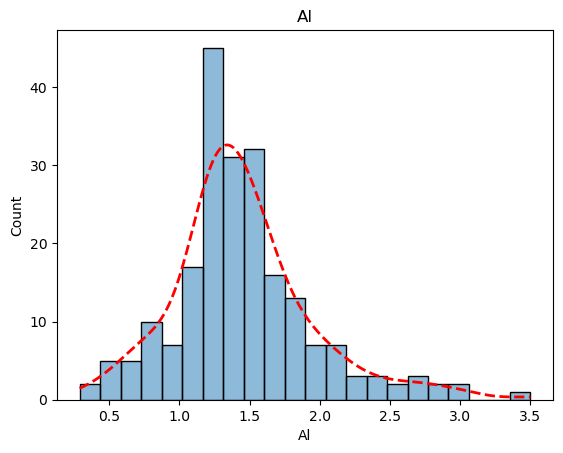

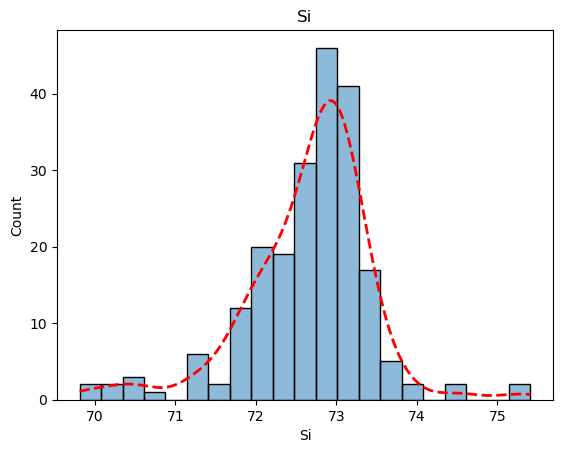

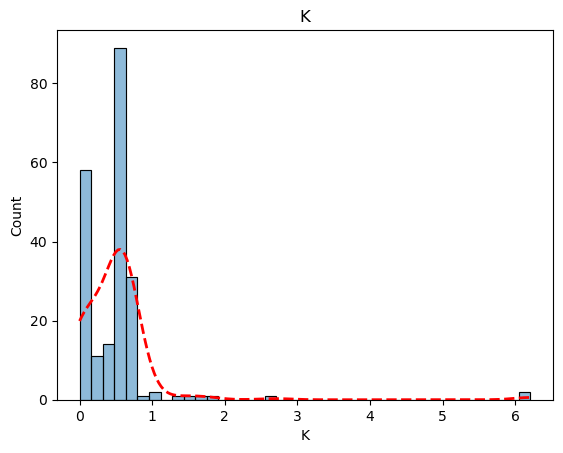

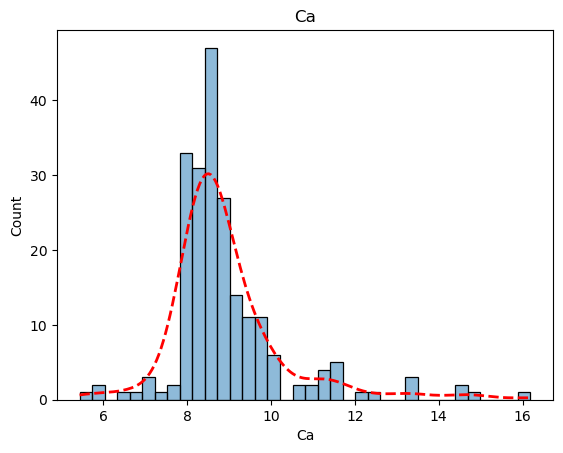

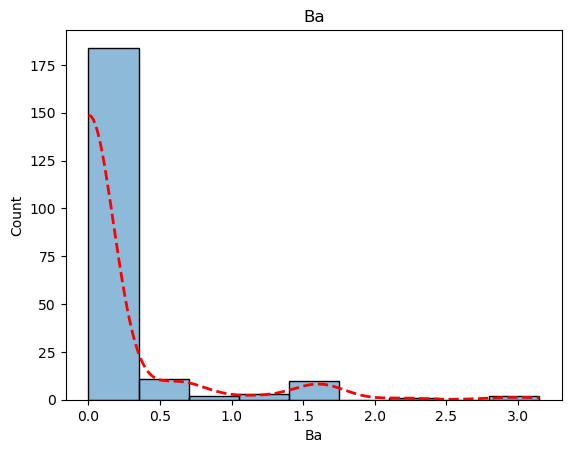

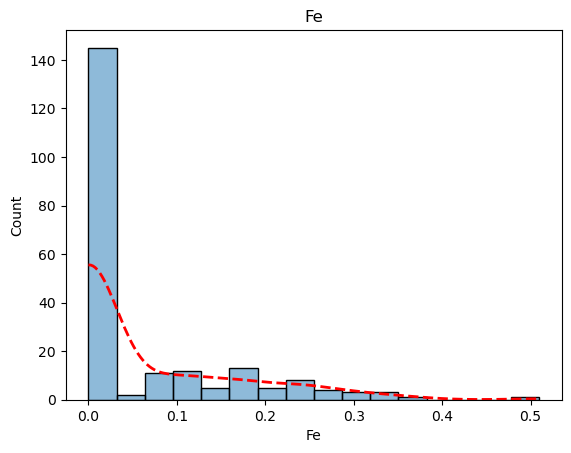

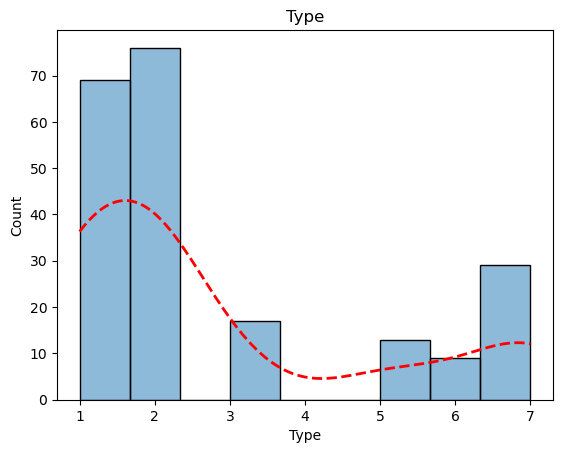

In [12]:
#histogram
for i in df1:
    sns.histplot(df1[i], kde = True,
                line_kws = {'linestyle':'dashed',
                         'linewidth':'2'}).lines[0].set_color('red')
    plt.title(i)
    plt.show()

<Axes: >

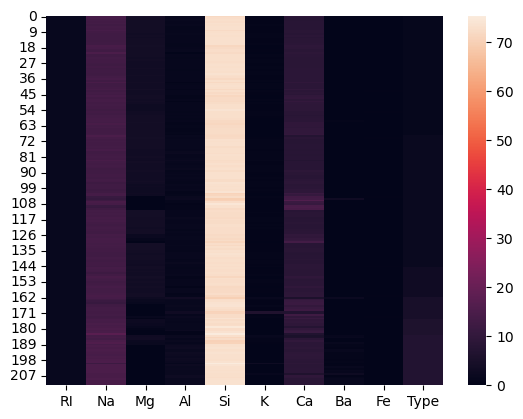

In [13]:
# Heat Map
sns.heatmap(data=df1)

In [14]:
# Correlation
df1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


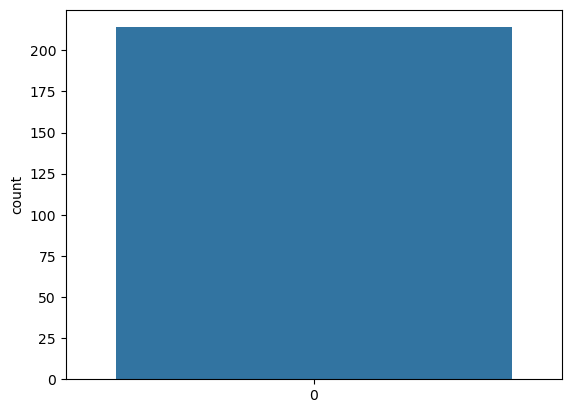

In [15]:
# checking count of categories for categorical columns 
sns.countplot(df['Type'])
plt.show()

In [16]:
target=df1[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
208,7
209,7
210,7
211,7


In [17]:
features=df1.drop('Type',axis=1)
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### Random Forest Implementation

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
#splitting the data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(159, 9)
(54, 9)
(159, 1)
(54, 1)


In [21]:
num_trees=100
max_features=1
skfolds=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)

In [22]:
model.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=1)

In [23]:
model.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=1)

In [24]:
import warnings
warnings.filterwarnings('ignore')
results=cross_val_score(model,x_train,y_train,cv=skfolds)
print(results.mean())

0.7737499999999999


In [25]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 2, 2, 2, 1, 2, 2, 7, 1, 1, 1, 1, 3, 6, 1, 1, 2, 2, 2, 2, 7,
       7, 2, 2, 3, 2, 2, 1, 7, 2, 1, 7, 1, 2, 5, 2, 1, 6, 5, 2, 1, 1, 2,
       2, 1, 7, 1, 2, 7, 2, 2, 7, 5], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)

0.7777777777777778

### Bagging

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [28]:
bag_class=BaggingClassifier(LogisticRegression(multi_class='ovr'),n_estimators=50,bootstrap=True)

In [29]:
bag_class.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(multi_class='ovr'),
                  n_estimators=50)

In [30]:
y_pred=bag_class.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred)

0.5925925925925926

### Ada Boost Classification

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
ada_boost=AdaBoostClassifier(estimator=RandomForestClassifier(),n_estimators=50,)

In [34]:
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier())

In [35]:
y_pred=ada_boost.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.7407407407407407

### Gradient Boost

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
grad_boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.3,max_depth=2)

In [39]:
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=2)

In [40]:
y_pred=grad_boost.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.6851851851851852

### XG Boost

In [42]:
import xgboost as xgb

In [43]:
xg_boost=xgb.XGBClassifier(n_estimator=100,min_child_weight=2,max_depth=2,learning_rate=0.2)

In [44]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
y_train=lab_enc.fit_transform(y_train)
y_test=lab_enc.fit_transform(y_test)

In [45]:
xg_boost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_pred=xg_boost.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.7777777777777778

#### Bagging and Boosting

Bagging and boosting are both ensemble learning techniques used to improve the performance of machine learning models by combining the predictions of multiple base learners. However, they differ in how they create and combine these base learners.

Bagging (Bootstrap Aggregating):

In bagging, multiple base learners are trained independently on different subsets of the training data. These subsets are created by randomly sampling the training data with replacement (bootstrap sampling).
Each base learner is trained on a different subset of the data, and their predictions are then combined through averaging (for regression) or voting (for classification).
Bagging helps to reduce variance and improve the stability of the model by reducing the impact of outliers and noise in the training data.
Examples of bagging algorithms include Random Forest and Bagged Decision Trees.
Boosting:

Unlike bagging, boosting trains multiple base learners sequentially, where each base learner is trained to correct the errors made by the previous ones.
Boosting focuses on improving the performance of the model by giving more weight to the examples that were previously misclassified, allowing subsequent models to learn from the mistakes of the previous ones.
In boosting, each base learner is typically a weak learner, meaning it performs slightly better than random chance.
Examples of boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.
Key Differences:

Training Process: Bagging trains base learners independently, while boosting trains them sequentially.
Data Sampling: Bagging randomly samples the training data with replacement for each base learner, while boosting assigns different weights to the training examples to focus on the ones that are harder to classify correctly.
Base Learners: Bagging typically uses high-variance models (like decision trees), while boosting often uses simple base learners (like shallow decision trees or stumps).
Combining Predictions: Bagging combines predictions through averaging or voting, while boosting combines them through weighted averaging.
In summary, bagging and boosting are both powerful ensemble techniques, but they differ in their approach to combining base learners and training process. Bagging focuses on reducing variance, while boosting aims to improve both bias and variance by iteratively correcting the errors of previous models.

Handling imbalance in data

Handling imbalance in data is crucial in machine learning tasks, especially in classification problems where the classes are not evenly distributed. Here are several techniques to handle class imbalance:

Resampling Techniques:

Over-sampling: Increase the number of minority class examples by randomly duplicating them or generating synthetic samples (e.g., using SMOTE - Synthetic Minority Over-sampling Technique).
Under-sampling: Decrease the number of majority class examples by randomly removing instances. This can help balance the class distribution but might lead to loss of information.
Algorithmic Techniques:

Cost-sensitive Learning: Assign different misclassification costs to different classes to penalize misclassifications of the minority class more heavily.
Algorithm-Specific Techniques: Some algorithms have built-in mechanisms to handle imbalance, such as class weights in decision trees or support vector machines.
Ensemble Techniques:

Bagging and Boosting: These ensemble methods can help improve performance on imbalanced data by combining multiple models trained on different subsets of the data or by giving more weight to misclassified instances.
Evaluation Metrics:

Use evaluation metrics that are robust to class imbalance, such as:
Precision, Recall, and F1-score: They provide insights into the performance of the classifier for each class.
ROC-AUC (Receiver Operating Characteristic - Area Under Curve): It measures the trade-off between true positive rate and false positive rate across different threshold values.
Data Preprocessing:

Feature Engineering: Selecting informative features and removing irrelevant ones can help improve the model's ability to learn from imbalanced data.
Data Augmentation: Introduce variations to the existing data to increase its diversity, especially for the minority class.
Ensemble of Different Approaches:

Combining multiple techniques mentioned above can often lead to better results than using any single technique in isolation.
Cross-Validation Strategies:

Use cross-validation techniques such as Stratified K-Fold to ensure that each fold preserves the same class distribution as the original dataset.
Anomaly Detection:

Treat the minority class as anomalies and apply anomaly detection techniques to identify them. This approach can be useful when the minority class represents rare events or outliers.
By employing one or a combination of these techniques, you can effectively handle class imbalance and build more robust machine learning models. The choice of technique(s) depends on the specific characteristics of your dataset and the requirements of your problem.